In [76]:
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
from ipyleaflet import Map, basemaps, basemap_to_tiles, CircleMarker
from ipywidgets import interact, interactive, fixed, interact_manual
import contextily as ctx
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
confirmed = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed['geometry'] = [Point(row.Long, row.Lat) for i,row in confirmed.iterrows()]
confirmed_geo = gpd.GeoDataFrame(confirmed)
confirmed_geo

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,geometry
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,40,40,74,84,94,110,110,120,170,POINT (65.00000 33.00000)
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,POINT (20.16830 41.15330)
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,201,230,264,302,367,409,454,511,584,POINT (1.65960 28.03390)
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,113,133,164,188,224,267,308,334,370,POINT (1.52180 42.50630)
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,3,3,3,4,4,5,7,7,POINT (17.87390 -11.20270)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,POINT (-63.06860 18.22060)
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,POINT (-64.64000 18.42070)
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,0,0,0,0,0,0,4,4,5,POINT (-71.79790 21.69400)
252,NaN,MS Zaandam,0.0000,0.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2,2,POINT (0.00000 0.00000)


interactive(children=(SelectionSlider(description='Dates', layout=Layout(width='500px'), options=('1/22/20', '…

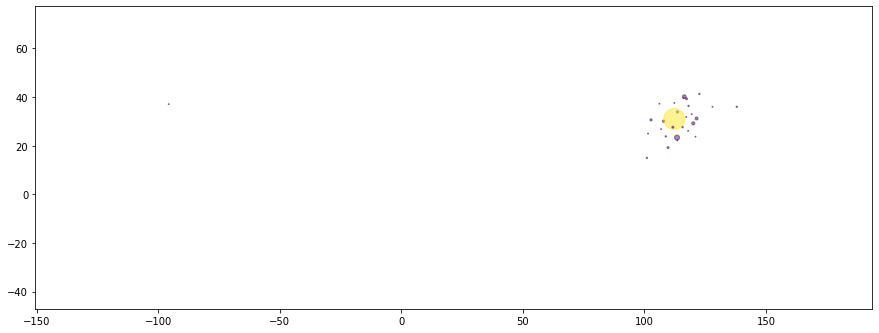

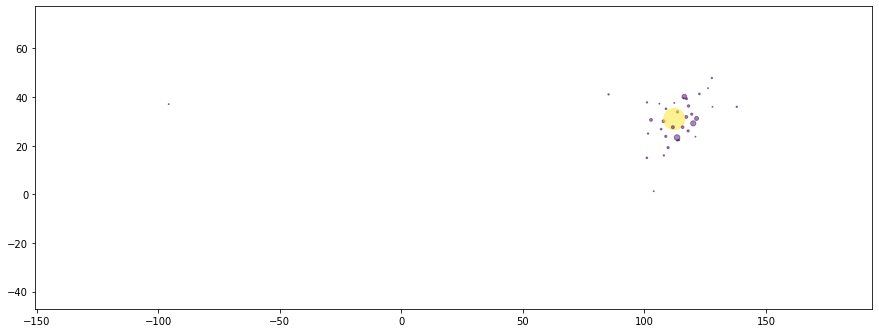

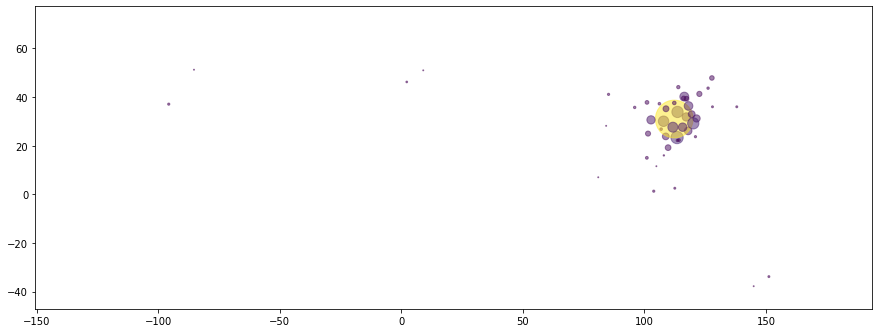

In [82]:
from datetime import datetime
start_date = datetime(2020, 1, 22)
end_date = datetime(2020, 3, 30)

dates = pd.date_range(start_date, end_date, freq='D')

options = [date.strftime('%-m/%-d/%y') for date in dates]

selection_slider = widgets.SelectionSlider(
    options=options,
#     value=options[0],
    description='Dates',
    orientation='horizontal',
    layout={'width': '500px'}
)

@interact(date=selection_slider)
def plot_conf_cases(date):
    fig,ax = plt.subplots(1, 1, figsize=(15,15))
#     date = date[1:-2]
    print(date)
    last_date = date
    if date in confirmed_geo.columns:
        confirmed_geo.plot(ax=ax, column=date, markersize=confirmed_geo[date], alpha=.5);
        last_date = date
    else:
        confirmed_geo.plot(ax=ax, column=last_date, 
                           markersize=np.log(confirmed_geo[last_date].values), 
                           alpha=.5,
                          legend=True);
#     ctx.add_basemap(ax)
    ax.set_axis_off()
   

In [61]:
print(options[0][0])

01/22/2020


In [18]:
confirmed_geo.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', 'geometry'],
      dtype='object')